In [1]:
# from sklearn.model_selection import 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# Whether the person will buy the insurance or not!
## Steps
### Import dataset
### 1.EDA Exploratory Data Analysis
### 2. Data Cleaning - Dealing with null values and removing outliers
### 3. Building Model

In [2]:
data = pd.read_csv(r"C:\Users\asus\OneDrive\DS Intellipat\Excel\bank-additional-full.csv", sep = ";")

In [3]:
data.head(14)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45.0,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59.0,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41.0,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24.0,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25.0,services,single,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# eda --> exploratory data analysis

data.head(5)
data["y"]

# y--> buying the insurance
# y--> did not buy the insurance 
# yes ---> 1
# no ---> 0
data["y"] = np.where(data["y"] == "yes", 1, 0)
data["y"] = data["y"].astype(str)

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [6]:
data.shape
# displays rows and columns
# 41199 -> rows
# 21 -> columns

(41199, 21)

In [7]:
data["y"]

0        0
1        0
2        0
3        0
4        0
        ..
41194    0
41195    0
41196    0
41197    0
41198    0
Name: y, Length: 41199, dtype: object

In [8]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,0
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,0
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,0
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
41198,74.0,retired,married,professional.course,no,yes,NaN,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,NaN,-50.8,1.028,4963.6,0


In [9]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [11]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [13]:
data.isnull().sum().sum()
# isnull()
# isna() --> check the null value
# sum() --> added and given the result

73

In [14]:
data["y"]

0        0
1        0
2        0
3        0
4        0
        ..
41194    0
41195    0
41196    0
41197    0
41198    0
Name: y, Length: 41199, dtype: object

In [15]:
data["y"].value_counts()

0    36559
1     4640
Name: y, dtype: int64

# if we have an outlier median will give better answer than mean because outlier will affect mean drastically

<AxesSubplot: xlabel='age'>

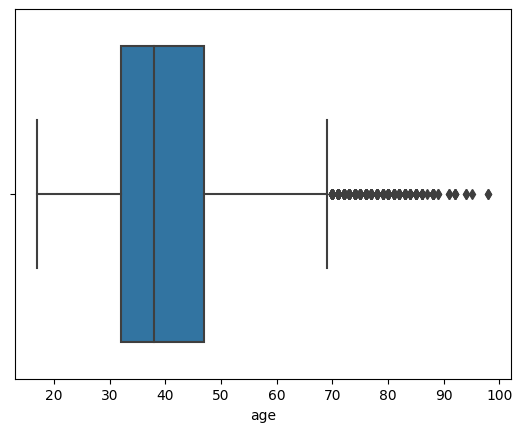

In [16]:
import seaborn as sns
sns.boxplot(x= data["age"])


<AxesSubplot: xlabel='age'>

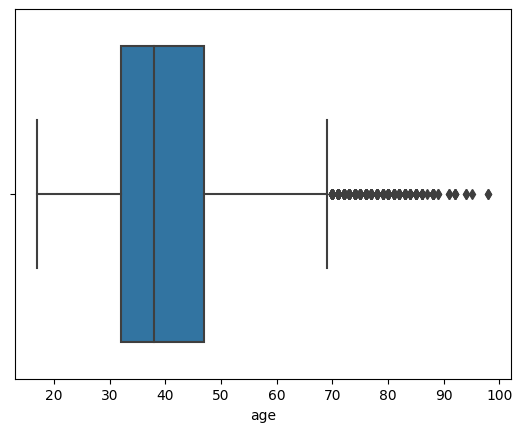

In [17]:
sns.boxplot(x=data["age"])

In [18]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [19]:
q3, q1 = np.nanpercentile(data["age"], [75, 25])
print(q3, q1)

IQR = q3 - q1
print(IQR)
ul = q3 + 1.5 * IQR
ll = q1 - 1.5 * IQR
print(f"Upper Limit, {ul}\n Lower Limit - {ll}")

47.0 32.0
15.0
Upper Limit, 69.5
 Lower Limit - 9.5


####  The statistical minimum or l, also known as the low outlier limit, is the minimum value in a set of values, excluding any outliers


## Removing the outliers

In [20]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                15.000
duration          217.000
campaign            2.000
pdays               0.000
previous            0.000
emp.var.rate        3.200
cons.price.idx      0.919
cons.conf.idx       6.300
euribor3m           3.617
nr.employed       129.000
dtype: float64


In [38]:
data = data[~((data < (Q1 - 1.5 * IQR )) | (data > (Q3 + 1.5 * IQR ))).any(axis=1)]
# data = data[((data < (Q1 - 1.5 * IQR )) & (data > (Q3 + 1.5 * IQR )).any(axis=1))]

In [22]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45.0,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59.0,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41.0,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24.0,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25.0,services,single,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [23]:
data.shape

(30363, 21)

In [24]:
col_list = list(data.columns)
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [25]:
col_list.remove("y")

In [26]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

## Filling the null values with mode where it is object type and filling with mean or median when its numeric type

In [27]:
for col in col_list:
    if data[col].dtypes == "object":
        data[col] = data[col].fillna(data[col].mode()[0])
        
    else:
        data[col] = data[col].fillna(data[col].mean())

In [28]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [29]:
data["marital"].value_counts()

married     18650
single       8305
divorced     3362
unknown        46
Name: marital, dtype: int64

In [30]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30363 entries, 0 to 41197
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30363 non-null  float64
 1   job             30363 non-null  object 
 2   marital         30363 non-null  object 
 3   education       30363 non-null  object 
 4   default         30363 non-null  object 
 5   housing         30363 non-null  object 
 6   loan            30363 non-null  object 
 7   contact         30363 non-null  object 
 8   month           30363 non-null  object 
 9   day_of_week     30363 non-null  object 
 10  duration        30363 non-null  float64
 11  campaign        30363 non-null  float64
 12  pdays           30363 non-null  float64
 13  previous        30363 non-null  float64
 14  poutcome        30363 non-null  object 
 15  emp.var.rate    30363 non-null  float64
 16  cons.price.idx  30363 non-null  float64
 17  cons.conf.idx   30363 non-null 

## Apply label encoding and change type of data most of that data is in object format

# Binning

In [31]:
# Binning of age
# 10 15 25 5 60
# 1 - 10 --> 10, 5
# 11 - 20 --> 15
# 21 - 30 --> 25
# 51 - 60 --> 60
## Grouping of data is called binning# Binning of sex

bins = [0, 1, 5, 10, 25, 50, 100]
data["age"] = pd.cut(data["age"], bins)
data["age"] = data.age.astype(str)


In [32]:
data["age"].unique()

array(['(50, 100]', '(25, 50]', '(10, 25]'], dtype=object)

In [33]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41185,"(50, 100]",retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.000000,999.0,0.0,nonexistent,-1.100000,94.767000,-50.800000,1.028000,4963.600000,0
41186,"(25, 50]",technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.000000,999.0,0.0,nonexistent,-1.100000,94.767000,-50.800000,1.028000,4963.600000,1
41188,"(25, 50]",admin.,married,university.degree,no,yes,no,cellular,may,mon,...,2.081555,999.0,0.0,nonexistent,0.388261,93.646458,-40.410119,3.970239,5181.932372,0
41191,"(25, 50]",admin.,married,university.degree,no,yes,no,cellular,may,mon,...,2.081555,999.0,0.0,nonexistent,0.388261,93.646458,-40.410119,3.970239,5181.932372,0
41197,"(25, 50]",admin.,married,university.degree,no,yes,no,cellular,may,mon,...,2.081555,999.0,0.0,nonexistent,0.388261,93.646458,-40.410119,3.970239,5181.932372,0


In [34]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in col_list:
    data[i] = labelencoder.fit_transform(data[i])
    
    

    
    

In [35]:
# fit_transform() is used on the training data so that we can scale the training data and also learn
# the scaling parameters of that data. Here, the model built by us will learn the mean and variance of
# the features of the training set. These learned parameters are then used to scale our test data.

# So what actually is happening here! 🤔

# The fit method is calculating the mean and variance of each of the features present in our data.
# The transform method is transforming all the features using the respective mean and variance.

# # Now, we want scaling to be applied to our tesst data too and at the same time do not want to be
# biased with our model. We want our test data to be a completely new and a surprise set for our model. 
# The transform method helps us in this case.

In [36]:
data.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,2,3,1,0,0,0,0,1,6,1,...,0,0,0,0,9,18,17,273,9,0
1,2,7,1,3,1,0,0,1,6,1,...,0,0,0,0,9,18,17,273,9,0
2,1,7,1,3,0,2,0,1,6,1,...,0,0,0,0,9,18,17,273,9,0
3,1,0,1,1,0,0,0,1,6,1,...,0,0,0,0,9,18,17,273,9,0
4,2,7,1,3,0,0,2,1,6,1,...,0,0,0,0,9,18,17,273,9,0
5,1,7,1,2,1,0,0,1,6,1,...,0,0,0,0,9,18,17,273,9,0
6,2,0,1,5,0,0,0,1,6,1,...,0,0,0,0,9,18,17,273,9,0
7,1,1,1,7,1,0,0,1,6,1,...,0,0,0,0,9,18,17,273,9,0
8,0,9,2,5,0,2,0,1,6,1,...,0,0,0,0,9,18,17,273,9,0
9,0,7,2,3,0,2,0,1,6,1,...,0,0,0,0,9,18,17,273,9,0


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if (( data[col].dtype != "object") & (col != "y")):
        col_list.append(col)
    
X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range (len(X.columns))]
vif_data

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
data = data.drop(["poutcome"], axis = 1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if (( data[col].dtype != "object") & (col != "y")):
        col_list.append(col)
    
X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range (len(X.columns))]
vif_data

In [ ]:
vif_data.feature


In [ ]:
ind_features = list(vif_data.feature)
ind_features

In [ ]:
# A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when 
# there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely

# affect your regression results. The VIF estimates how much the variance of a regression coefficient is inflated
# due to multicollinearity in the model.

# VIFs are usually calculated by software, as part of regression analysis. You’ll see a VIF column as part of the 
# output. VIFs are calculated by taking a predictor, and regressing it against every other predictor in the model. 
# This gives you the R-squared values, which can then be plugged into the VIF formula. “i” is the predictor you’re 
# looking at (e.g. x1 or x2):
# variance inflation factor


# 1 = not correlated.
# Between 1 and 5 = moderately correlated.
# Greater than 5 = highly correlated.


In [ ]:
df_ind = data[ind_features]
df_ind

In [ ]:
df_dep = data["y"]
df_dep

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_ind, df_dep, train_size = 0.75, random_state = 0)

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
y_test

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()


## Model Fitting / Training


In [ ]:
LR.fit(x_train, y_train)

In [ ]:
test_pred = LR.predict(x_test)

In [ ]:
np.unique(test_pred)

In [ ]:
data["y"].value_counts()

In [ ]:
from sklearn.metrics import *

In [ ]:
c1 = confusion_matrix(y_test, test_pred)

In [ ]:
c1

In [ ]:
accuracy_score(y_test, test_pred)

In [ ]:
sen = c1[0, 0]/ (c1[0, 0] + c1[0, 1])
sen
# Sensitivity How much % of model has predicted the correct data

In [ ]:
sep = c1[1, 1] / (c1[1, 1] + c1[1, 0])
sep
# how much % of the model has predicted the data in wrong manner

In [ ]:
print(classification_report(y_test, test_pred))